# Normal Numpy script

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import tracemalloc
import numpy as np
import timeit
import scipy

In [2]:
def get_memory(cosine_sim_function, n_items, embedding_size, float_type='float64', function_kwargs=None):
    embeddings = np.random.randn(n_items, embedding_size).astype(float_type)
    tracemalloc.clear_traces()
    tracemalloc.start()
    if function_kwargs is not None:
        similarity = cosine_sim_function(embeddings, **function_kwargs)
    else:
        similarity = cosine_sim_function(embeddings)
    _, max_size = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    if isinstance(similarity, scipy.sparse.csr_matrix):
        matrix_bytes = similarity.data.nbytes + similarity.indptr.nbytes + similarity.indices.nbytes
    else:
        matrix_bytes = similarity.nbytes
    return max_size, matrix_bytes

def get_time(cosine_sim_function, n_items, embedding_size, float_type='float64', n=10, function_kwargs=None):
    embeddings = np.random.randn(n_items, embedding_size).astype(float_type)

    def _similarity():
        if function_kwargs is not None:
            cosine_sim_function(embeddings, **function_kwargs)
        else:
            cosine_sim_function(embeddings)

    result = timeit.timeit(stmt='_similarity()', globals=locals(), number=n)
    return result / n

In [3]:
# embedding_size = 100
# step = int(1E3)
# n_items = range(1, int(1E4) + step + 1, step)

# max_memory = []
# matrix_memory = []
# execution_time = []
# for n in n_items:
#     max_size, matrix_size = get_memory(cosine_similarity, n, embedding_size)
#     _time = get_time(cosine_similarity, n, embedding_size)
#     max_memory.append(max_size)
#     matrix_memory.append(matrix_size)
#     execution_time.append(_time)

In [4]:
from matplotlib import pyplot as plt

def plot_memory(n_items, max_memory, matrix_memory):
    plt.figure(facecolor='white')
    plt.plot(n_items, [n / 1E9 for n in max_memory], color="cyan", label="Max memory")
    plt.plot(n_items, [n / 1E9 for n in matrix_memory], color="purple", label="Matrix memory")
    plt.scatter(n_items, [8 * n**2 / 1E9 for n in n_items], color="green", marker="*", label="8 bytes * n^2")
    plt.legend(loc="upper left")
    plt.ylabel("GB"), plt.xlabel("N items")
    plt.show()
    
def plot_time(n_items, execution_time):
    plt.figure(facecolor='white')
    plt.plot(n_items, execution_time, color="purple", label="Execution time")
    coeff_2, coeff_1, coeff_0 = np.polyfit(n_items, execution_time, 2)
    plt.scatter(n_items, [coeff_0 + coeff_1 * n + coeff_2 * n **2 for n in n_items], color="green", marker="*", label="Seconds")
    plt.legend(loc="upper left")
    plt.show()

In [5]:
# plot_memory(n_items, max_memory, matrix_memory)

In [6]:
# plot_time(n_items, execution_time)

In [7]:
# from matplotlib import pyplot as plt
# %matplotlib inline

# n_items_big = range(0, int(1E6) + 1, int(1E5))
# plt.figure(facecolor='white')
# plt.scatter(n_items_big, [8 * n**2 / 1E9 for n in n_items_big], color="green", marker="*", label="Memory in GB")
# plt.legend(loc="upper left")
# plt.show()

# plt.figure(facecolor='white')
# coeff_2, coeff_1, coeff_0 = np.polyfit(n_items, execution_time, 2)
# plt.scatter(n_items_big, [(coeff_0 + coeff_1 * n + coeff_2 * n **2) / 3600 for n in n_items_big], color="green", marker="*", label="Hours")
# plt.legend(loc="upper left")
# plt.show()

# coeff_2, coeff_1, coeff_0 = np.polyfit(n_items, execution_time, 2)


## SkLearn cosine_similarity with 1M items

In [8]:
# embedding_size = 300
# n_items = int(1E6)

# embeddings = np.random.randn(n_items, embedding_size)
# cosine_similarity(embeddings)

$
\begin{bmatrix}
a_1 & a_2 & a_3 \\
b_1 & b_2 & b_3 \\
c_1 & c_2 & c_3 \\
... & ... & ... \\
z_1 & z_2 & z_3 
\end{bmatrix}_{n_{items} \times M}
$

$
\begin{bmatrix}
a_1 & a_2 & a_3 \\
b_1 & b_2 & b_3 \\
c_1 & c_2 & c_3 \\
... & ... & ... \\
z_1 & z_2 & z_3 
\end{bmatrix}_{n_{items} \times M}
\times
\begin{bmatrix}
a_1 & b_1 & c_1 & ... & z_1 \\
a_2 & b_2 & c_2 & ... & z_2 \\
a_3 & b_3 & c_3 & ... & z_3
\end{bmatrix}_{M \times n_{items} }
=
\begin{bmatrix}
a \cdot a & a \cdot b & a \cdot c & ... & a \cdot z \\
b \cdot a & b \cdot b & b \cdot c & ... & b \cdot z \\
c \cdot a & c \cdot b & c \cdot c & ... & c \cdot z \\
... & ... & ... & ... & ... \\
z \cdot a & z \cdot b & z \cdot c & ... & z \cdot z \\
\end{bmatrix}_{n_{items} \times n_{items}}
\leftarrow\text{Similarity Matrix}
$

$
\begin{bmatrix}
a_1 & a_2 & a_3 \\
b_1 & b_2 & b_3 \\
... & ... & ... \\
k_1 & k_2 & k_3 
\end{bmatrix}
\times
\begin{bmatrix}
a_1 & b_1 & c_1 & ... & z_1 \\
a_2 & b_2 & c_2 & ... & z_2 \\
a_3 & b_3 & c_3 & ... & z_3 \\
\end{bmatrix}
=
\begin{bmatrix}
a \cdot a & a \cdot b & a \cdot c & ... & a \cdot z \\
b \cdot a & b \cdot b & b \cdot c & ... & b \cdot z \\
... & ... & ... & ... & ... \\
k \cdot a & k \cdot b & k \cdot c & ... & k \cdot z \\
\end{bmatrix}_{n_{items} \times n_{items}}
\leftarrow\text{Similarity Matrix}
\\
\begin{bmatrix}
k_1 & k_2 & k_3 \\
l_1 & l_2 & l_3 \\
... & ... & ... \\
z_1 & z_2 & z_3 
\end{bmatrix}
\times
\begin{bmatrix}
a_1 & b_1 & c_1 & ... & z_1 \\
a_2 & b_2 & c_2 & ... & z_2 \\
a_3 & b_3 & c_3 & ... & z_3 \\
\end{bmatrix}
=
\begin{bmatrix}
k \cdot a & k \cdot b & k \cdot c & ... & k \cdot z \\
l \cdot a & l \cdot b & l \cdot c & ... & l \cdot z \\
... & ... & ... & ... & ... \\
z \cdot a & z \cdot b & z \cdot c & ... & z \cdot z \\
\end{bmatrix}_{n_{items} \times n_{items}}
\leftarrow\text{Similarity Matrix}
$

## Numba

In [9]:
import psutil
import math
import numpy as np
from numba import njit, prange
import numba
from scipy.sparse import csr_matrix

from numba_argpartition import np_argpartition

In [86]:
import logging
LOGGER = logging.getLogger()
LOGGER.setLevel(logging.DEBUG)
logging.debug("test")


def get_chunk_size_per_thread():
    memory = psutil.virtual_memory()
    # get maximum possible matrix of size chunk_size x chunk_size given available memory
    M = memory.available
    chunk_size = math.floor(math.sqrt(M / 8)) # 8 bytes for a float64 or double type
    N = numba.get_num_threads()
    chunk_size_per_thread = math.ceil(chunk_size / N)
    LOGGER.info(f"Memory available: {M / 1E9:.2f} GB")
    LOGGER.info(f"Number of threads: {N}")
    LOGGER.info(f"Chunk size per thread: {chunk_size_per_thread}")
    
    return chunk_size_per_thread  

@njit(parallel=False) #. noting to parallaleize in this function will raise a warning if used
def to_sparse(m, top_k):
    n_rows, n_cols = m.shape
    top_k_j = np.argpartition(m, -top_k)[:, -top_k:]
    values = np.take_along_axis(m, top_k_j, axis=1).flatten()
    indices = top_k_j.flatten()
    return values, indices
    
@njit(parallel=True)
def chunked_dot(x, y, top_k, chunk_size):
    n_rows = len(x)
    n_non_zero = n_rows * top_k
    all_values, all_indices, all_indptr = np.empty(n_non_zero), np.empty(n_non_zero), np.empty(n_rows + 1)
    all_indptr[0] = 0
    N_THREADS = numba.get_num_threads()
    numba.set_num_threads(1)
    for i in prange(0, math.ceil(len(x) / chunk_size)):
        start_row_i = i * chunk_size
        end_row_i = (i + 1) * chunk_size
        chunk_m = np.dot(x[start_row_i: end_row_i], y)
        values, indices = to_sparse(chunk_m, top_k)
        all_values[start_row_i * top_k: end_row_i * top_k] = values
        all_indices[start_row_i * top_k: end_row_i * top_k] = indices
    numba.set_num_threads(N_THREADS)
    # standard CSR form representation
    all_indptr = np.arange(0, top_k * (1 + n_rows), top_k)
    return all_values, all_indices, all_indptr
        
def warm_up_numba_function():
    x = np.random.randn(10000, 10).astype('double')
    chunked_dot(x, x.T, 3)
    
        
def cosine_similarity_top_k(m, top_k=None):
    if top_k is None:
        top_k = m.shape[0]
#     warm_up_numba_function()
    chunk_size_per_thread = get_chunk_size_per_thread()
    values, indices, indptr = chunked_dot(m, m.T, top_k, chunk_size_per_thread)
    m = csr_matrix((values, indices, indptr))
    return m

DEBUG:root:test


In [87]:
embedding_size = 100
step = int(2E3)
max_n_items = int(2E4)
n_items = range(step, max_n_items + 1, step)

max_memory = []
matrix_memory = []
execution_time = []
for n in n_items:
    display(n, clear=True)
    function_kwargs = {"top_k": 100}
    max_size, matrix_size = get_memory(cosine_similarity_top_k, n, embedding_size, function_kwargs=function_kwargs)
#     _time = get_time(cosine_similarity_top_k, n, embedding_size, function_kwargs=function_kwargs)
    max_memory.append(max_size)
    matrix_memory.append(matrix_size)
#     execution_time.append(_time)

20000

INFO:root:Memory available: 18.11 GB
INFO:root:Number of threads: 16
INFO:root:Chunk size per thread: 2974


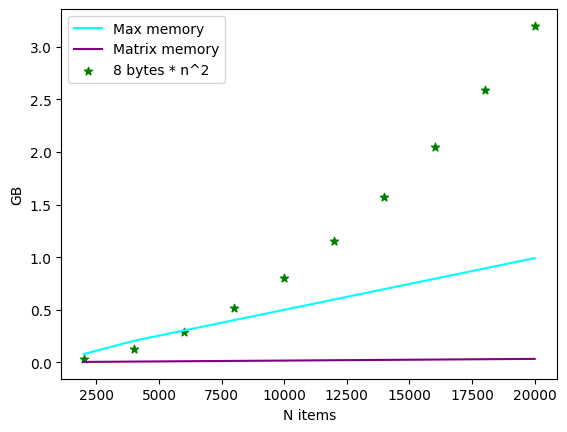

In [89]:
plot_memory(n_items, max_memory, matrix_memory)
plt.show()
# plot_time(n_items, execution_time)
# plt.show()

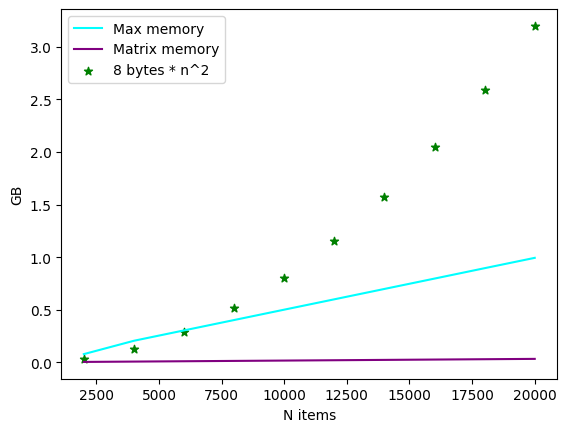

In [37]:
plot_memory(n_items, max_memory, matrix_memory)
plt.show()
# plot_time(n_items, execution_time)
# plt.show()

In [98]:
i = 4
nn = n_items[i]
nn

10000

In [99]:
matrix_memory[i] / 1E9

0.016080008

In [100]:
max_memory[i] / 1E9

0.498980181

In [103]:
top_k = 100

(nn * top_k * 2 + nn)  * 8 / 1E9

0.01608

In [111]:
((2981 * nn) + (2981 * nn) ) * 8/ 1E9

0.47696